In [86]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale,robust_scale
os.getcwd()
%matplotlib inline

In [26]:
df_raw = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/FITNESS_결측.csv',engine='python',encoding='euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [33]:
#결측치 제거후 summary값 보기
df_raw.dropna().describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,47.133333,77.372200,46.953167,10.651333,169.633333,56.966667,173.366667
std,5.721908,8.471344,4.861037,1.361965,10.427032,18.052573,9.030536
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.250000,73.115000,44.887750,9.947500,162.500000,48.000000,168.000000
50%,48.000000,76.885000,46.723000,10.485000,169.000000,54.000000,172.000000
75%,51.000000,82.693250,49.694500,11.320000,176.000000,61.250000,179.000000
max,57.000000,91.630000,59.571000,14.030000,186.000000,144.000000,192.000000


In [27]:
df_raw.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.178276,47.375806,10.586129,169.645161,56.677419,173.774194
std,5.860016,8.554578,5.327231,1.387414,10.251986,17.822060,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.030000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,76.320000,46.774000,10.470000,170.000000,53.000000,172.000000
75%,51.000000,82.780000,50.131000,11.270000,176.000000,60.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,144.000000,192.000000


In [12]:
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [13]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [19]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [40]:
df_raw['GENDER'].fillna("여성",inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [41]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433067
여성    72.908750
Name: WEIGHT, dtype: float64

In [44]:
#weight에 null값이라면 평균값으로 대체 한다.
df_raw["WEIGHT"]= df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")['WEIGHT'].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


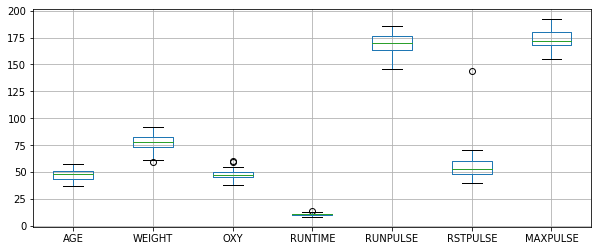

In [34]:
df_raw.boxplot(figsize = (10,4))

In [39]:
df_raw["RSTPULSE"]>=100
df_raw.loc[27:29]
df_raw[df_raw["RSTPULSE"]>=100]


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [45]:
df_fittness = df_raw[df_raw["RSTPULSE"]<100]
df_fittness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [50]:
df_fittness.reset_index(drop=True,inplace=True)
df_fittness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [54]:
#bfill 사용하기 뒷방향으로 채우기
df1= pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/FITNESS_결측.csv',engine='python',encoding='euc-kr')
df1.fillna(method="bfill",inplace=True)
df1.head()

In [108]:
#이상치 확인 후 nan 대치한 후 평균값 대치
df2= pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/FITNESS_결측.csv',engine='python',encoding='euc-kr')
df2.loc[df2['RSTPULSE']>=100, "RSTPULSE"] = np.nan
# df2.groupby("GENDER")["RSTPULSE"].agg("mean")

#남녀 별 평균으로 대체
df2["RSTPULSE"] = df2['RSTPULSE'].fillna(df2.groupby("GENDER")["RSTPULSE"].transform("mean")).round(3)
df2.loc[27:]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58.000,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,56.571,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63.000,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56.000,192


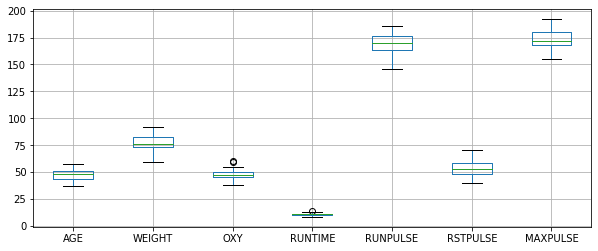

In [110]:
df2.boxplot(figsize = (10,4))

In [60]:
#문자형 변수가 아닌것을 뽑아내기
df_fittness_num=df_fittness.select_dtypes(exclude = 'object' )
df_fittness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [61]:
#문자형 변수만 뽑아내기
df_fittness_str=df_fittness.select_dtypes(include = 'object' )
df_fittness_str.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [112]:
#수치형 데이터값 정규화 하기
df_scale_std = scale(df_fittness_num)
df_scale_std = pd.DataFrame(df_scale_std , columns = df_fittness_num.columns)
df_scale_std.head()


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [68]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [113]:
df_scale_minmax = minmax_scale(df_fittness_num)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fittness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [114]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [116]:
df_scale_robust = robust_scale(df_fittness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fittness_num.columns)

df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [117]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [120]:
df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] = df_fittness_num["RSTPULSE"]
df_rstpulse['Standard'] = df_scale_std["RSTPULSE"]
df_rstpulse['MinMax'] = df_scale_minmax["RSTPULSE"]
df_rstpulse['Robust'] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)




,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [119]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,53.767,53.767,53.767
std,7.542,7.542,7.542,7.542
min,40.000,40.000,40.000,40.000
25%,48.000,48.000,48.000,48.000
50%,52.500,52.500,52.500,52.500
75%,58.750,58.750,58.750,58.750
max,70.000,70.000,70.000,70.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18e23cbd10>,
      dtype=object)

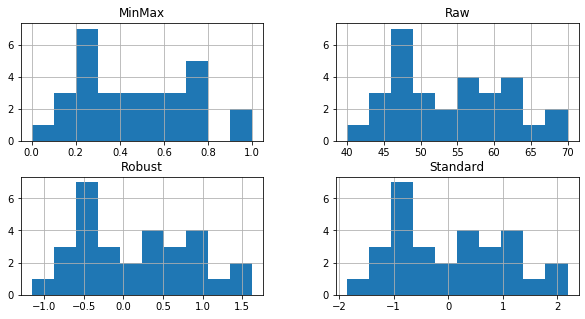

In [126]:
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize = (10,5))



In [3]:
#범주형 = 바 차트
#연속형 변수의 빈도 = 히스토그램
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts as p
import matplotlib.font_manager as fm
import os
# font_location  = '/home/pirl/포항공대 /아카데미수업내용/2주차/malgun.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# plt.rc('font', family = font_name)

In [4]:
df_fitness = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/FITNESS.csv',engine='python',encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [5]:
df_currency = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/환율.csv',engine='python',encoding='euc-kr',parse_dates=['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [11]:
df_count = df_fitness["GENDER"].value_counts()
df_count

여성    16
남성    15
Name: GENDER, dtype: int64

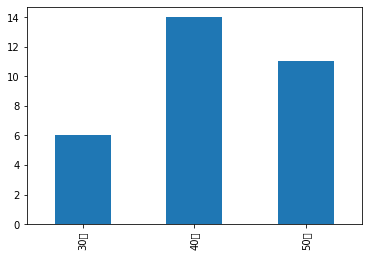

In [196]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace = True)
df_count.plot.bar()

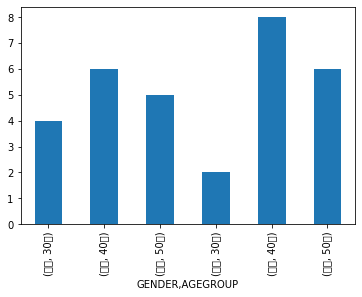

In [197]:

df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"],as_index = False).size()
df_groupby_total.plot.bar()

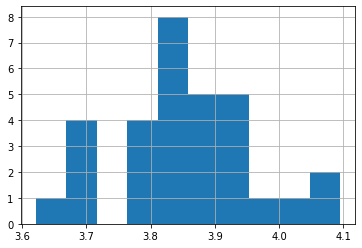

In [166]:

np.log(df_fitness["OXY"]).hist()
# df_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18dd90e7d0>,
      dtype=object)

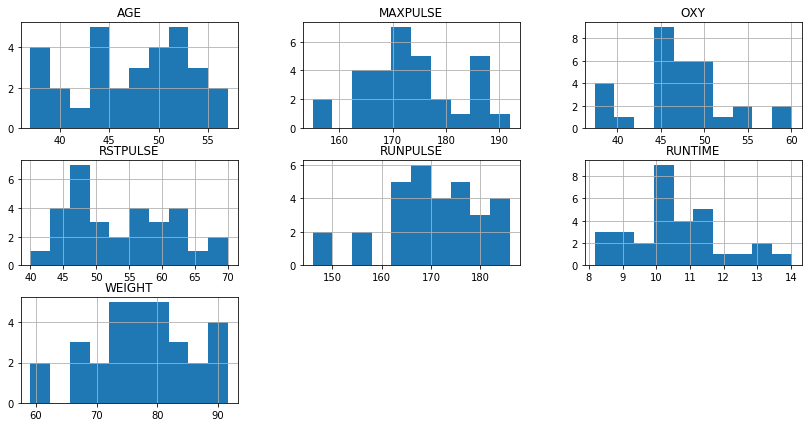

In [164]:
df_fitness.hist(figsize = (14,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f18dd3f9390>,
      dtype=object)

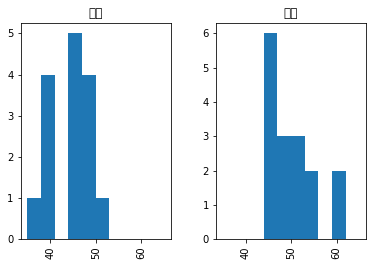

In [168]:
df_fitness.hist(column="OXY", by ="GENDER", range = (35,65))

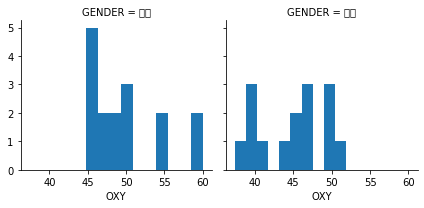

In [169]:
grid = sns.FacetGrid(df_fitness, col = "GENDER")
grid.map(plt.hist,"OXY")

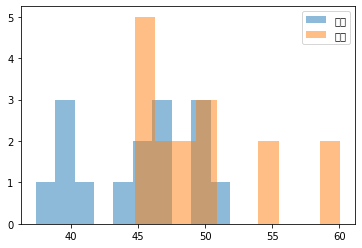

In [182]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"],label = "남성", alpha= 0.5, bins= 10)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"],label = "여성", alpha= 0.5 , bins = 10)
plt.legend()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

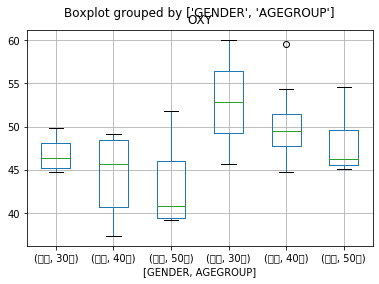

In [186]:
df_fitness.boxplot(column = "OXY", by=["GENDER","AGEGROUP"])

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

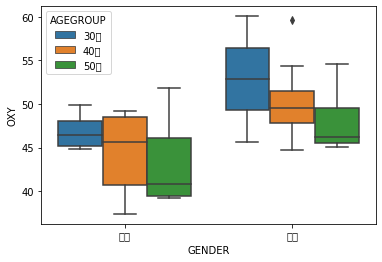

In [187]:

sns.boxplot(x="GENDER", y="OXY", hue="AGEGROUP", data = df_fitness, order=["남성","여성"], hue_order=["30대","40대","50대"])
plt.show()

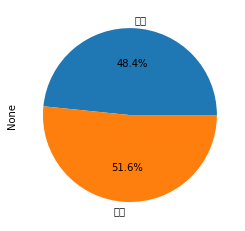

In [198]:
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

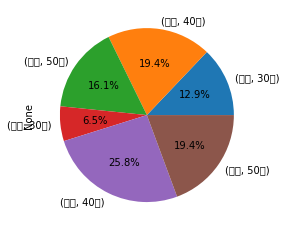

In [210]:
df_count = df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

In [218]:
# import pyecharts
# # from pyecharts import Bar
age_array = df_fitness["AGEGROUP"][df_fitness["GENDER"] == "남성"]
female_count_array = df_fitness["AGEGROUP"][df_fitness["GENDER"] == "여성"]
male_count_array = df_fitness["AGEGROUP"][df_fitness["GENDER"] == "남성"]


female_count_array
# # age_array는 기존의 CLNT_ATE = {10,20,30,40,..} 형식으로 되어있던 데이터를
# # {"10대","20대","30대","40대" ...}의 형식으로 바꾸기 위하여 반복문으로 생성한 리스트

# bar = pyecharts.Bar("고객 연령별 성비 분포")
# bar.add("여성", age_array, female_count_array, mark_line=["average"], is_label_show=True)
# bar.add("남성", age_array, male_count_array, mark_line=["average"], is_label_show=True)
# bar.height = 500
# bar.width = 900
# bar

0     40대
1     30대
2     40대
3     50대
6     40대
7     50대
8     50대
9     50대
11    40대
12    40대
15    50대
17    40대
20    50대
21    40대
24    40대
26    30대
Name: AGEGROUP, dtype: object

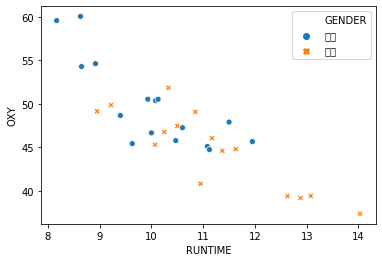

In [208]:
sns.scatterplot(x="RUNTIME", y="OXY",hue="GENDER",style="GENDER", data = df_fitness)

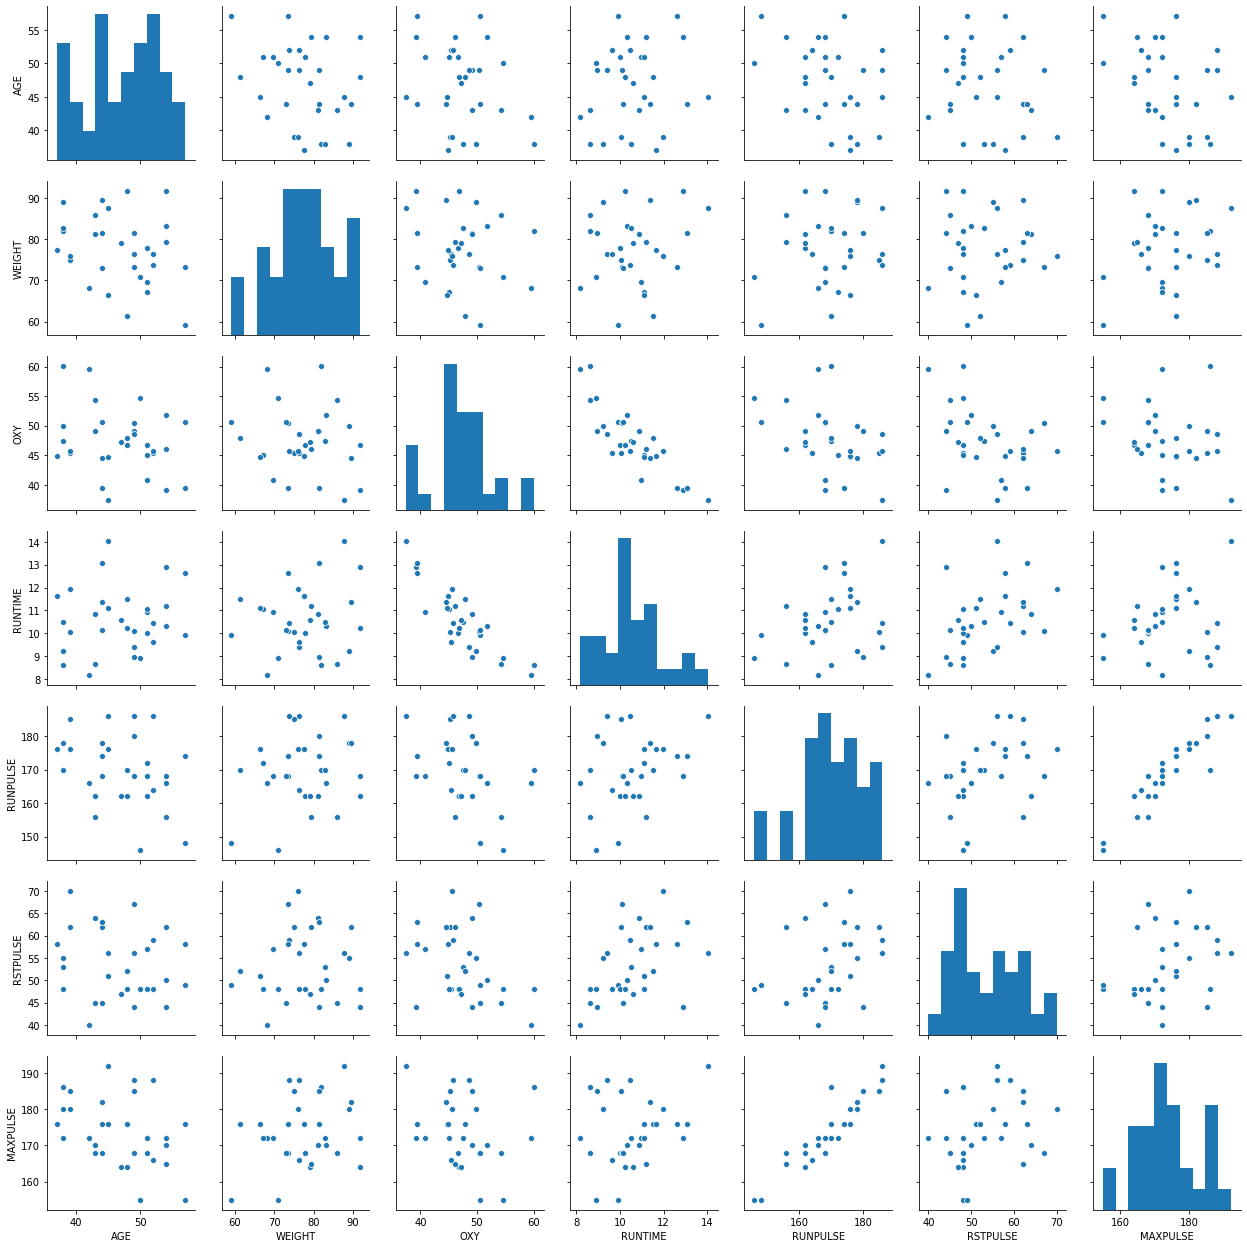

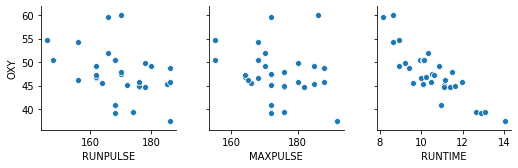

In [241]:
#회귀분석때 중요
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars = ["RUNPULSE","MAXPULSE","RUNTIME"])


In [242]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE",columns='CURRENCY',values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


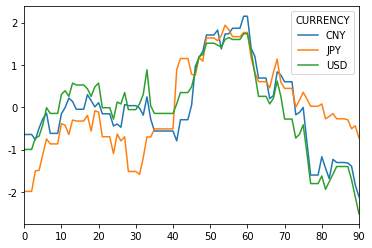

In [252]:
# df_currency_pivot[["CNY","JPY","USD"]].plot()

#수치형 데이터값 정규화 하기
df_scale_std = scale(df_currency_pivot[["CNY","JPY","USD"]])
df_scale_std = pd.DataFrame(df_scale_std , columns = df_currency_pivot.columns)
df_scale_std.head()
df_scale_std[["CNY","JPY","USD"]].plot()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

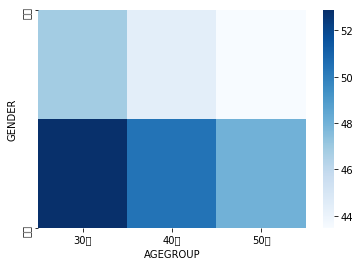

In [254]:
df_agg = df_fitness.groupby(["GENDER","AGEGROUP"],as_index = False).agg("mean")
df_pivot = df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot,cmap="Blues")

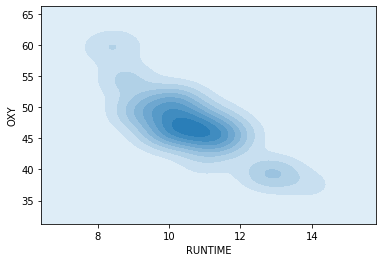

In [258]:
sns.scatterplot(x="RUNTIME",y="OXY",data=df_fitness)
sns.kdeplot(df_fitness["RUNTIME"],df_fitness["OXY"],shade=True)

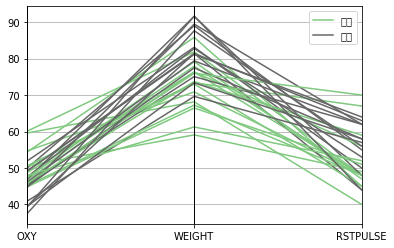

In [259]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER",cols=["OXY","WEIGHT","RSTPULSE"],colormap="Accent")

Text(485.7977272727271, 0.5, '혈당 산소 요구량')

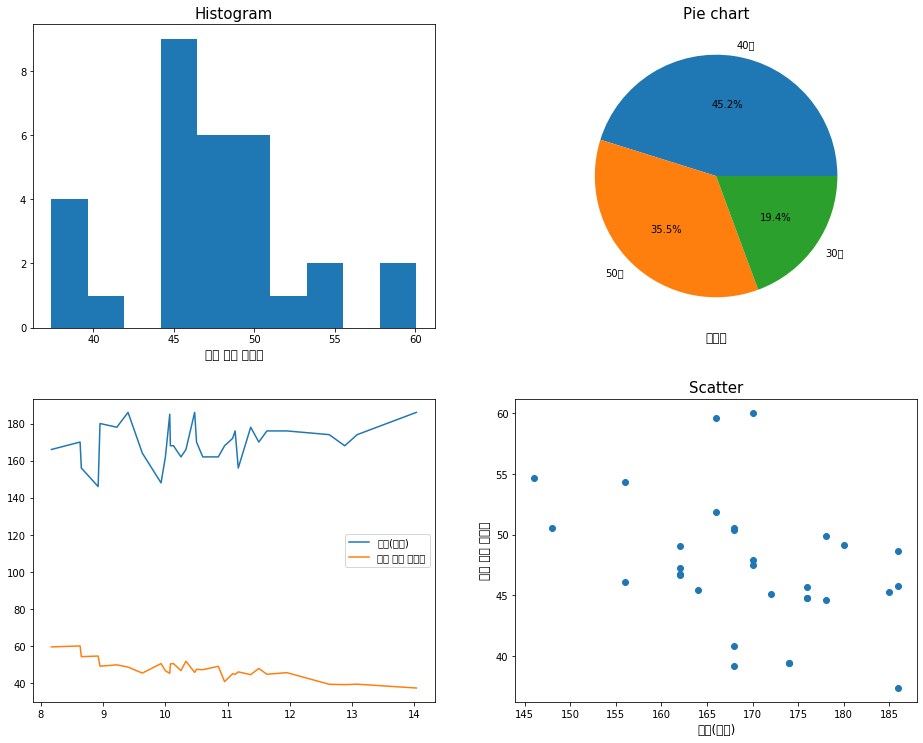

In [276]:
df_count = df_fitness["AGEGROUP"].value_counts()
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (13,10))
plt.tight_layout(w_pad=5,h_pad=5)

#histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize = 15)
axes[0,0].set_xlabel("혈당 산소 요구량",fontsize=12)

#pie chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct="%.1f%%")
axes[0,1].set_title("Pie chart",fontsize = 15)
axes[0,1].set_xlabel("연령대",fontsize=12)

#Trend
axes[1,0].plot("RUNTIME","RUNPULSE",data=df_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME","OXY",data=df_fitness,label="혈당 산소 요구량")
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE","OXY",data = df_fitness)
axes[1,1].set_title("Scatter",fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)",fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량",fontsize=12)





SyntaxError: invalid syntax (<ipython-input-268-9d8633b32bdb>, line 1)